## Disease Prediction

### Dataset Source:  
https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset?select=dataset.csv 

### Target Outcome:  
1. Train a machine learning model to predict disease based on symptoms.  
2. Deploy the model to be used for application.  

### Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('Disease_Symptom_Prediction\dataset.csv')

#### Dataset Exploration

In [2]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove _  and trailing space from Symptom strings

In [3]:
for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')

for col in df.columns:
    df[col] = df[col].str.strip()

df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Shape of Data

In [4]:
print("There are ", df.shape[0], " rows and ", df.shape[1], " columns.")

There are  4920  rows and  18  columns.


#### Creating a column with all symptoms for each row

In [5]:
df["All_Symptoms"] = 0

for i in range(df.shape[0]):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["All_Symptoms"][i] = values[1:values.index(0)]
    else:
        df["All_Symptoms"][i] = values[1:]

df.head()

C:\Users\kianm\AppData\Local\Temp\ipykernel_24812\1528610647.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["All_Symptoms"][i] = values[1:values.index(0)]
C:\Users\kianm\AppData\Local\Temp\ipykernel_24812\1528610647.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['itching', 'skin rash', 'nodal skin eruptions', 'dischromic  patches', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df["All_Symptoms"][i] = values[1:values.index(0)]


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,All_Symptoms
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, nodal skin eruptions, dis..."
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[skin rash, nodal skin eruptions, dischromic ..."
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal skin eruptions, dischromic pa..."
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, dischromic patches, nan,..."
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin rash, nodal skin eruptions, nan..."


In [6]:
diseaseAllSymptoms = df[['Disease', 'All_Symptoms']]
diseaseAllSymptoms.head()

,Disease,All_Symptoms
0,Fungal infection,"[itching, skin rash, nodal skin eruptions, dis..."
1,Fungal infection,"[skin rash, nodal skin eruptions, dischromic ..."
2,Fungal infection,"[itching, nodal skin eruptions, dischromic pa..."
3,Fungal infection,"[itching, skin rash, dischromic patches, nan,..."
4,Fungal infection,"[itching, skin rash, nodal skin eruptions, nan..."


In [7]:
diseaseAllSymptoms = diseaseAllSymptoms.drop_duplicates(subset='Disease')
diseaseAllSymptoms["All_Symptoms"] = df["All_Symptoms"].apply(lambda x:[symptom for symptom in x if pd.notna(symptom)])
diseaseAllSymptoms.head(41)

,Disease,All_Symptoms
0,Fungal infection,"[itching, skin rash, nodal skin eruptions, dis..."
10,Allergy,"[continuous sneezing, shivering, chills, water..."
20,GERD,"[stomach pain, acidity, ulcers on tongue, vomi..."
30,Chronic cholestasis,"[itching, vomiting, yellowish skin, nausea, lo..."
40,Drug Reaction,"[itching, skin rash, stomach pain, burning mic..."
50,Peptic ulcer diseae,"[vomiting, loss of appetite, abdominal pain, p..."
60,AIDS,"[muscle wasting, patches in throat, high fever..."
70,Diabetes,"[fatigue, weight loss, restlessness, lethargy,..."
80,Gastroenteritis,"[vomiting, sunken eyes, dehydration, diarrhoea]"
90,Bronchial Asthma,"[fatigue, cough, high fever, breathlessness, f..."


In [8]:
diseaseAllSymptoms.values

array([['Fungal infection',
        list(['itching', 'skin rash', 'nodal skin eruptions', 'dischromic  patches'])],
       ['Allergy',
        list(['continuous sneezing', 'shivering', 'chills', 'watering from eyes'])],
       ['GERD',
        list(['stomach pain', 'acidity', 'ulcers on tongue', 'vomiting', 'cough', 'chest pain'])],
       ['Chronic cholestasis',
        list(['itching', 'vomiting', 'yellowish skin', 'nausea', 'loss of appetite', 'abdominal pain', 'yellowing of eyes'])],
       ['Drug Reaction',
        list(['itching', 'skin rash', 'stomach pain', 'burning micturition', 'spotting  urination'])],
       ['Peptic ulcer diseae',
        list(['vomiting', 'loss of appetite', 'abdominal pain', 'passage of gases', 'internal itching'])],
       ['AIDS',
        list(['muscle wasting', 'patches in throat', 'high fever', 'extra marital contacts'])],
       ['Diabetes',
        list(['fatigue', 'weight loss', 'restlessness', 'lethargy', 'irregular sugar level', 'blurred and dis

In [9]:
diseaseAllSymptoms["Symptom Count"] = diseaseAllSymptoms["All_Symptoms"].apply(len)
print(diseaseAllSymptoms[['Disease', 'Symptom Count']])

                                     Disease  Symptom Count
0                           Fungal infection              4
10                                   Allergy              4
20                                      GERD              6
30                       Chronic cholestasis              7
40                             Drug Reaction              5
50                       Peptic ulcer diseae              5
60                                      AIDS              4
70                                  Diabetes             10
80                           Gastroenteritis              4
90                          Bronchial Asthma              6
100                             Hypertension              5
110                                 Migraine              9
120                     Cervical spondylosis              5
130             Paralysis (brain hemorrhage)              4
140                                 Jaundice              8
150                                  Mal

#### Converting Dataframe with Symptoms as columns

In [10]:
column_values = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()

In [11]:
symps = pd.unique(column_values) 
symps = symps.tolist()
symps = [i for i in symps if str(i) != 'nan']
symptoms= pd.DataFrame(columns=symps, index=df.index)
symptoms

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,bladder discomfort,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
symptoms['Symptoms'] = df['All_Symptoms']

for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

symptoms['Diesease'] = df['Disease']
symptoms_df = symptoms.drop("Symptoms", axis=1)
symptoms_df.head()

C:\Users\kianm\AppData\Local\Temp\ipykernel_24812\1716308673.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  symptoms['Diesease'] = df['Disease']


,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze,Diesease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [13]:
symptoms_df.tail(20)

,itching,skin rash,nodal skin eruptions,dischromic patches,continuous sneezing,shivering,chills,watering from eyes,stomach pain,acidity,...,foul smell of urine,continuous feel of urine,skin peeling,silver like dusting,small dents in nails,inflammatory nails,blister,red sore around nose,yellow crust ooze,Diesease
4900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
4901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis D
4902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
4903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
4904,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Tuberculosis
4905,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Common Cold
4906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
4907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
4908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Heart attack
4909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins


In [14]:
symptoms_df.shape

(4920, 132)

### Checking how many rows of data per disease

In [15]:
symptoms_df['Diesease'].value_counts()

Diesease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Alle

### Train, test, split data

In [16]:
features = symptoms_df.iloc[:,0:-1]
target = symptoms_df.iloc[:,-1:]

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Decision Tree

### Determing the max leaf nodes using cross validation score

#### Max Leaf Nodes
Max leaf nodes is hyperparameter for the decision tree. A leaf node is where a decision or prediction is made. When setting the max leaf nodes, user limit maximum number of terminal nodes that a tree can and help prevent overfitting. 

#### Cross Validation Score
In Scikit Learn cross_val_score, it performs cross validation by spliting the dataset into n (determined by the user) equally sized subsets and the proceded in n iterations, each using n-1 folds for training the model and 1 fold for testing. 

Iteration 1:

Fold 1: Test set, Folds 2-5: Training set
Train the model on Folds 2-5 and evaluate on Fold 1.

Iteration 2:

Fold 2: Test set, Folds 1, 3-5: Training set
Train the model on Folds 1, 3-5 and evaluate on Fold 2.

Iteration 3:
And so forth ....

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
maxLeafNodes = [40, 50, 60, 70, 80]
crossValScore = []

for i in maxLeafNodes:
    decisionTree = DecisionTreeClassifier(max_leaf_nodes=i)
    scores = cross_val_score(decisionTree, features, target, cv=5, scoring='accuracy')
    meanAccuracy = scores.mean()
    crossValScore.append(meanAccuracy)


for i in range(len(maxLeafNodes)):
    print(maxLeafNodes[i], " : ", crossValScore[i])


40  :  0.9341463414634147
50  :  0.9719512195121951
60  :  0.984959349593496
70  :  0.998780487804878
80  :  1.0


#### From the scores above, max leaf node of <b>60</b> is chosen as it is high enough but not too high to overfitting

In [211]:
from sklearn.metrics import accuracy_score

#While Loop to increase max_leaf_nodes and n_estimators to get the best model

DTAccuaracy = 0
leafNodesIncrease = 1
mLeafNodes = 60
DTModelList = []

while DTAccuaracy <= 0.98:
    #Train the model
    modelDT = DecisionTreeClassifier(max_leaf_nodes = mLeafNodes, random_state=42)
    modelDT.fit(x_train, y_train)
    
    #Evaluate the model
    y_pred_dt = modelDT.predict(x_test)
    DTAccuaracy = accuracy_score(y_test, y_pred_dt)

    #Append model to list for choosing later
    DTModelList.append(modelDT)
    
    #Print out the accuracy score and parameter used
    print("Max leaf nodes: " , mLeafNodes, ", Accuracy Score: ", DTAccuaracy, ", Model Number: ", len(DTModelList)-1)
    
    #Increment the n_estimators and the max leaf nodes
    mLeafNodes += leafNodesIncrease


Max leaf nodes:  60 , Accuracy Score:  0.9684959349593496 , Model Number:  0
Max leaf nodes:  61 , Accuracy Score:  0.9705284552845529 , Model Number:  1
Max leaf nodes:  62 , Accuracy Score:  0.9725609756097561 , Model Number:  2
Max leaf nodes:  63 , Accuracy Score:  0.9745934959349594 , Model Number:  3
Max leaf nodes:  64 , Accuracy Score:  0.9766260162601627 , Model Number:  4
Max leaf nodes:  65 , Accuracy Score:  0.9786585365853658 , Model Number:  5
Max leaf nodes:  66 , Accuracy Score:  0.9806910569105691 , Model Number:  6


### The best model that have high accuracy score and is not near overfitting is Model Number 6, with an accuracy score of 0.9806910569105691 

In [212]:
dtModel = DTModelList[6]

#Evaluate model again
y_pred_rf = dtModel.predict(x_test)
DTAccuaracy = accuracy_score(y_test, y_pred_rf)
print("Decision Tree model accuaracy: ", DTAccuaracy)

Decision Tree model accuaracy:  0.9806910569105691


## Decision Tree Confusion Matrix
To visualize any false positives or False neagtives with confusion matrix

In [213]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree")
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Tree
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 3  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 34]]


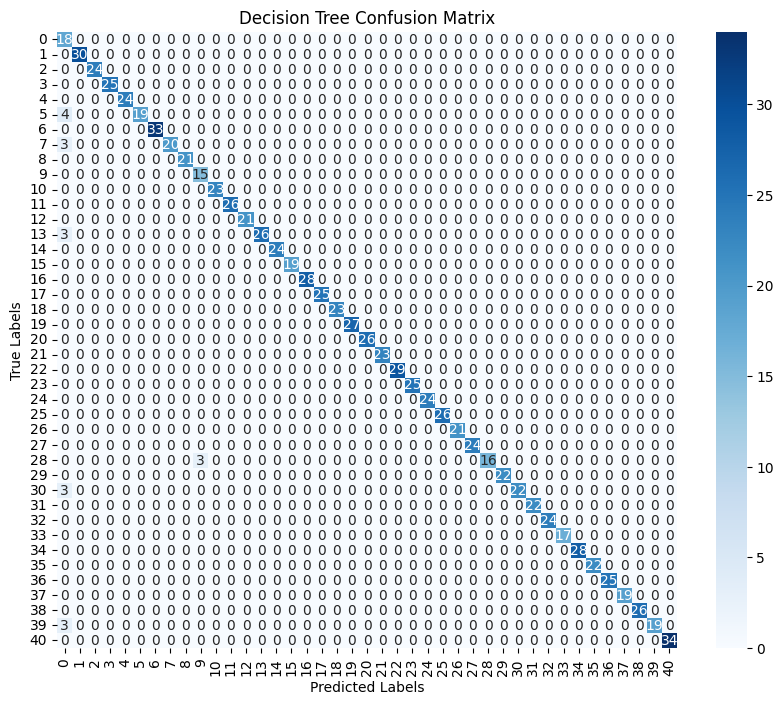

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")

plt.show()

In [225]:
diseases = [i for i in df["Disease"].unique()]
for i in range(len(diseases)):
    print(i, ": ", diseases[i])

0 :  Fungal infection
1 :  Allergy
2 :  GERD
3 :  Chronic cholestasis
4 :  Drug Reaction
5 :  Peptic ulcer diseae
6 :  AIDS
7 :  Diabetes
8 :  Gastroenteritis
9 :  Bronchial Asthma
10 :  Hypertension
11 :  Migraine
12 :  Cervical spondylosis
13 :  Paralysis (brain hemorrhage)
14 :  Jaundice
15 :  Malaria
16 :  Chicken pox
17 :  Dengue
18 :  Typhoid
19 :  hepatitis A
20 :  Hepatitis B
21 :  Hepatitis C
22 :  Hepatitis D
23 :  Hepatitis E
24 :  Alcoholic hepatitis
25 :  Tuberculosis
26 :  Common Cold
27 :  Pneumonia
28 :  Dimorphic hemmorhoids(piles)
29 :  Heart attack
30 :  Varicose veins
31 :  Hypothyroidism
32 :  Hyperthyroidism
33 :  Hypoglycemia
34 :  Osteoarthristis
35 :  Arthritis
36 :  (vertigo) Paroymsal  Positional Vertigo
37 :  Acne
38 :  Urinary tract infection
39 :  Psoriasis
40 :  Impetigo


### From the confusion matrix, disease Peptic ulcer diseae(4), Diabetes(3), Dimorphic hemmorhoids(piles)(3), Paralysis (brain hemorrhage)(3), Varicose veins(3), Psoriasis(3) have missclassifications.

### Export Decision Tree Model

In [217]:
import pickle

with open('DTPredictDiesease.pkl', 'wb') as file:
    pickle.dump(dtModel, file)


## Random Forest

### Determing the max leaf nodes  and n_estimators using cross validation score

#### Max Leaf Nodes
Max leaf nodes is hyperparameter for the underlying decision tree that makes up the random forest. A leaf node is where a decision or prediction is made. When setting the max leaf nodes, user limit maximum number of terminal nodes that a tree can and help prevent overfitting. 

#### n_estimators
Random forest is an ensemble of decision trees. Random forest n_estimators specifies the number of trees that will be built in the ensemble. 

#### Cross Validation Score
In Scikit Learn cross_val_score, it performs cross validation by spliting the dataset into n (determined by the user) equally sized subsets and the proceded in n iterations, each using n-1 folds for training the model and 1 fold for testing. 

Iteration 1:

Fold 1: Test set, Folds 2-5: Training set
Train the model on Folds 2-5 and evaluate on Fold 1.

Iteration 2:

Fold 2: Test set, Folds 1, 3-5: Training set
Train the model on Folds 1, 3-5 and evaluate on Fold 2.

Iteration 3:
And so forth ....

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
maxLeafNodes = [2, 3, 4, 5, 6, 7, 8]
crossValScore = []

for i in maxLeafNodes:
    rf = RandomForestClassifier(max_leaf_nodes=i)
    scores = cross_val_score(rf, features, target.values.ravel(), cv=5, scoring='accuracy')
    #As cv=5, will have 5 scores, get the mean of each leaf node for comparison later
    meanAccuracy = scores.mean()
    crossValScore.append(meanAccuracy)

for i in range(len(maxLeafNodes)):
    print(maxLeafNodes[i], " : ", crossValScore[i])



2  :  0.7754065040650406
3  :  0.9050813008130081
4  :  0.9591463414634147
5  :  0.9880081300813007
6  :  0.9965447154471544
7  :  0.9928861788617886
8  :  0.9979674796747968


#### From the scores above, max leaf node of <b>5</b> is chosen as it is high enough but not too high to overfitting. This will be the base for training the model later.

In [166]:
estimators = [80, 85, 90, 95, 100, 105, 110]
crossValScore = []

for i in estimators:
    rf = RandomForestClassifier(n_estimators=i, max_leaf_nodes=5)
    scores = cross_val_score(rf, features, target.values.ravel(), cv=5, scoring='accuracy')
    #As cv=5, will have 5 scores, get the mean of each leaf node for comparison later
    meanAccuracy = scores.mean()
    crossValScore.append(meanAccuracy)

for i in range(len(estimators)):
    print(estimators[i], " : ", crossValScore[i])

80  :  0.9796747967479675
85  :  0.9859756097560975
90  :  0.9845528455284553
95  :  0.9953252032520326
100  :  0.9784552845528456
105  :  0.9817073170731707
110  :  0.9806910569105691


#### From the scores above, n_estimators of <b>110</b> is chosen as it is high enough but not too high to overfitting. This will be the base for training the model later.

In [218]:
#Convert target values to 1D array for training in Random Forest
y_train_1d = y_train.values.ravel()

#While Loop to increase max_leaf_nodes and n_estimators to get the best model

randomForestAccuaracy = 0
estimatorIncrease = 5
leafNodesIncrease = 1
estimators = 110
mLeafNodes = 5
rfModelList = []

while randomForestAccuaracy <= 0.98:
    #Train the model
    modelRandomForest = RandomForestClassifier(n_estimators = estimators, 
                                               max_leaf_nodes = mLeafNodes, 
                                               random_state=42)
    modelRandomForest.fit(x_train, y_train_1d)
    
    #Evaluate the model
    y_pred_rf = modelRandomForest.predict(x_test)
    randomForestAccuaracy = accuracy_score(y_test, y_pred_rf)

    #Append model to list for choosing later
    rfModelList.append(modelRandomForest)
    
    #Print out the accuracy score and parameter used
    print("n_estimators: ", estimators, ", Max leaf nodes: " , mLeafNodes, ", Accuracy Score: ", randomForestAccuaracy, ", Model Number: ", len(rfModelList)-1)
    
    #Increment the n_estimators and the max leaf nodes
    estimators += estimatorIncrease
    mLeafNodes += leafNodesIncrease


n_estimators:  110 , Max leaf nodes:  5 , Accuracy Score:  0.943089430894309 , Model Number:  0
n_estimators:  115 , Max leaf nodes:  6 , Accuracy Score:  0.9684959349593496 , Model Number:  1
n_estimators:  120 , Max leaf nodes:  7 , Accuracy Score:  0.9664634146341463 , Model Number:  2
n_estimators:  125 , Max leaf nodes:  8 , Accuracy Score:  0.9684959349593496 , Model Number:  3
n_estimators:  130 , Max leaf nodes:  9 , Accuracy Score:  0.9908536585365854 , Model Number:  4


### The best model that have high accuracy score and is not near overfitting is Model Number 3, with an accuracy score of 0.9684959349593496 

In [219]:
#Assign Model number 3
rfModel = rfModelList[3]

#Evaluate model again
y_pred_rf = rfModel.predict(x_test)
randomForestAccuaracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest model accuaracy: ", randomForestAccuaracy)

Random Forest model accuaracy:  0.9684959349593496


In [220]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest")
print("Confusion Matrix:\n", conf_matrix_rf)

Random Forest
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


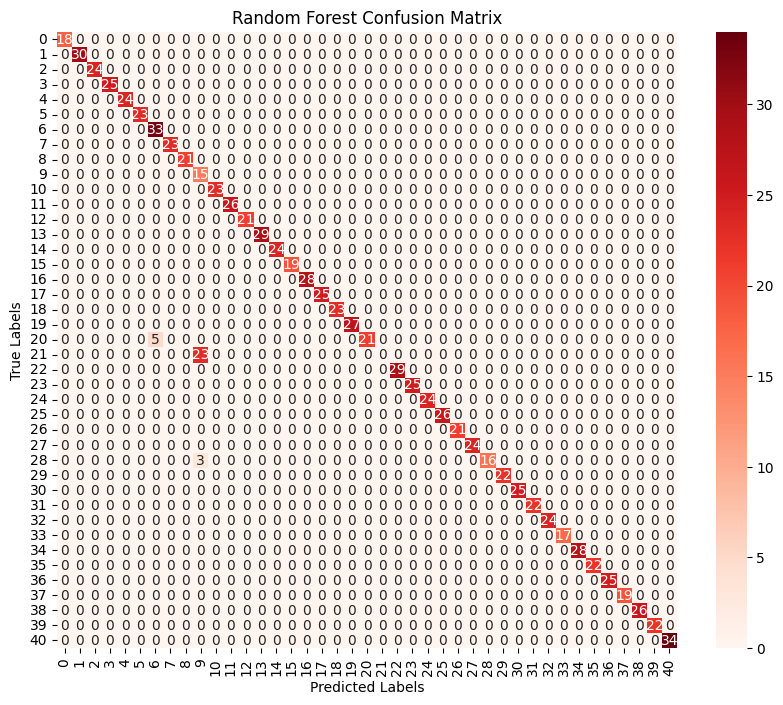

In [221]:
#Create Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Reds", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")

plt.show()

In [224]:
diseases = [i for i in df["Disease"].unique()]
for i in range(len(diseases)):
    print(i, ": ", diseases[i])

0 :  Fungal infection
1 :  Allergy
2 :  GERD
3 :  Chronic cholestasis
4 :  Drug Reaction
5 :  Peptic ulcer diseae
6 :  AIDS
7 :  Diabetes
8 :  Gastroenteritis
9 :  Bronchial Asthma
10 :  Hypertension
11 :  Migraine
12 :  Cervical spondylosis
13 :  Paralysis (brain hemorrhage)
14 :  Jaundice
15 :  Malaria
16 :  Chicken pox
17 :  Dengue
18 :  Typhoid
19 :  hepatitis A
20 :  Hepatitis B
21 :  Hepatitis C
22 :  Hepatitis D
23 :  Hepatitis E
24 :  Alcoholic hepatitis
25 :  Tuberculosis
26 :  Common Cold
27 :  Pneumonia
28 :  Dimorphic hemmorhoids(piles)
29 :  Heart attack
30 :  Varicose veins
31 :  Hypothyroidism
32 :  Hyperthyroidism
33 :  Hypoglycemia
34 :  Osteoarthristis
35 :  Arthritis
36 :  (vertigo) Paroymsal  Positional Vertigo
37 :  Acne
38 :  Urinary tract infection
39 :  Psoriasis
40 :  Impetigo


From the confusion matrix, disease Hepatitis B(5), Hepatitis C(23)  and Dimorphic hemmorhoids(piles)(3) have misclassifications.

### Export Random Forest Model

In [222]:
with open('RFPredictDiesease.pkl', 'wb') as file:
    pickle.dump(rfModel, file)

### Model Training Summary
1. Decision Tree gave acccuracy of 0.9806910569105691 and Random Forest classifier gave 0.9684959349593496 accuracy. 
2. Both were checked for wrongly classified disease using the confusion matrix.
3. Decision Tree have higher accuracy but have 6 diseases that have wrong classifications with each having 3 to 4 each missclassified.
4. Random Forest have lower accuracy score but have 3 disease missclassified with Hepatitis C having a high 23 missclassifications. 


### Selection of model for prediction
#### Decision Tree vs Random Forest

#### Decsion Tree
Advantages:
1. Simplicity: Decision trees are intuitive and easy to understand. 
2. Versatility: They can handle both categorical and numerical data, making them a flexible choice for a wide range of problems.
3. Feature selection: Decision trees inherently perform feature selection, using the most informative features first. 
4. It's model have higher accuracy than Random Forest.

Disadvantages:
1. Overfitting: Decision trees can create overly complex trees that don’t generalize well to unseen data. T
2. Bias towards features with more levels: Decision trees can be biased towards variables with more levels. Features with more unique values or categories may be favored over others, potentially leading to suboptimal trees.
3. Instability: Decision trees are sensitive to small changes in the data. A slight variation can result in a drastically different tree. 
4. Although it has higher accuracy, it has more disease (6) with missclassificattions.

#### Random Forests
In Random Forests, instead of just one decision tree making all the decisions, an "entire forest" of decision tress are created. Each tree gives it prediction based on the data seen. The final output is then determined by considering all the predictions made by all the trees in the forest.

Advantages:
1. Robust to Overfitting: Due to the random nature of the Random Forest (random sampling of data points and features), the model is less prone to overfitting than a single decision tree. Each individual tree gets a different view of the data, so the overall model can capture a broader picture of the data without as much risk of memorizing the training set.
2. Handles Large Datasets and Feature Spaces: Random Forest can easily handle datasets with many features and a large number of data points, making it a good choice for complex datasets.
3. Parallelizable: The training of the individual trees can be done in parallel, leading to faster training times.
4. Although it has lower accuracy compared to Decision Tree, it has only 3 disease with missclassifications.

Disadvantages:
1. Complexity: A Random Forest model creates a lot of trees (as defined by the user), which can make the model more complex and computationally expensive than a single decision tree.
2. Less Interpretability: While a single decision tree is easily interpretable, this is not the case with a Random Forest. The decision-making process of a Random Forest is not as straightforward to visualize or explain due to the aggregation of many trees.
3. Longer Prediction Time: Due to the need to make predictions with each tree in the forest, prediction time can be longer compared to other models.
4. It's model have lower accuracy than Decision Tree.



Source: https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948


#### Selection of Model

<b>Random forest is selected</b> as the model even though it has a lower accuracy (although still acceptable at 0.968) than Decision Tree but the it has lesser number of disease that have missclassification.

### Random Forest Model

#### Load the model

In [ ]:
import pickle
loaded_RF_model = pickle.load(open('RFPredictDiesease.pkl', 'rb'))
